In [1]:
#conda install python-graphviz

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Projeto Parte 1 : Apresentaçāo do Dataset

In [5]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [7]:
map = {"M":1, "B":0}
data['diagnosis'] = data['diagnosis'].replace(map)

In [8]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
data = data.drop(columns = 'Unnamed: 32')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


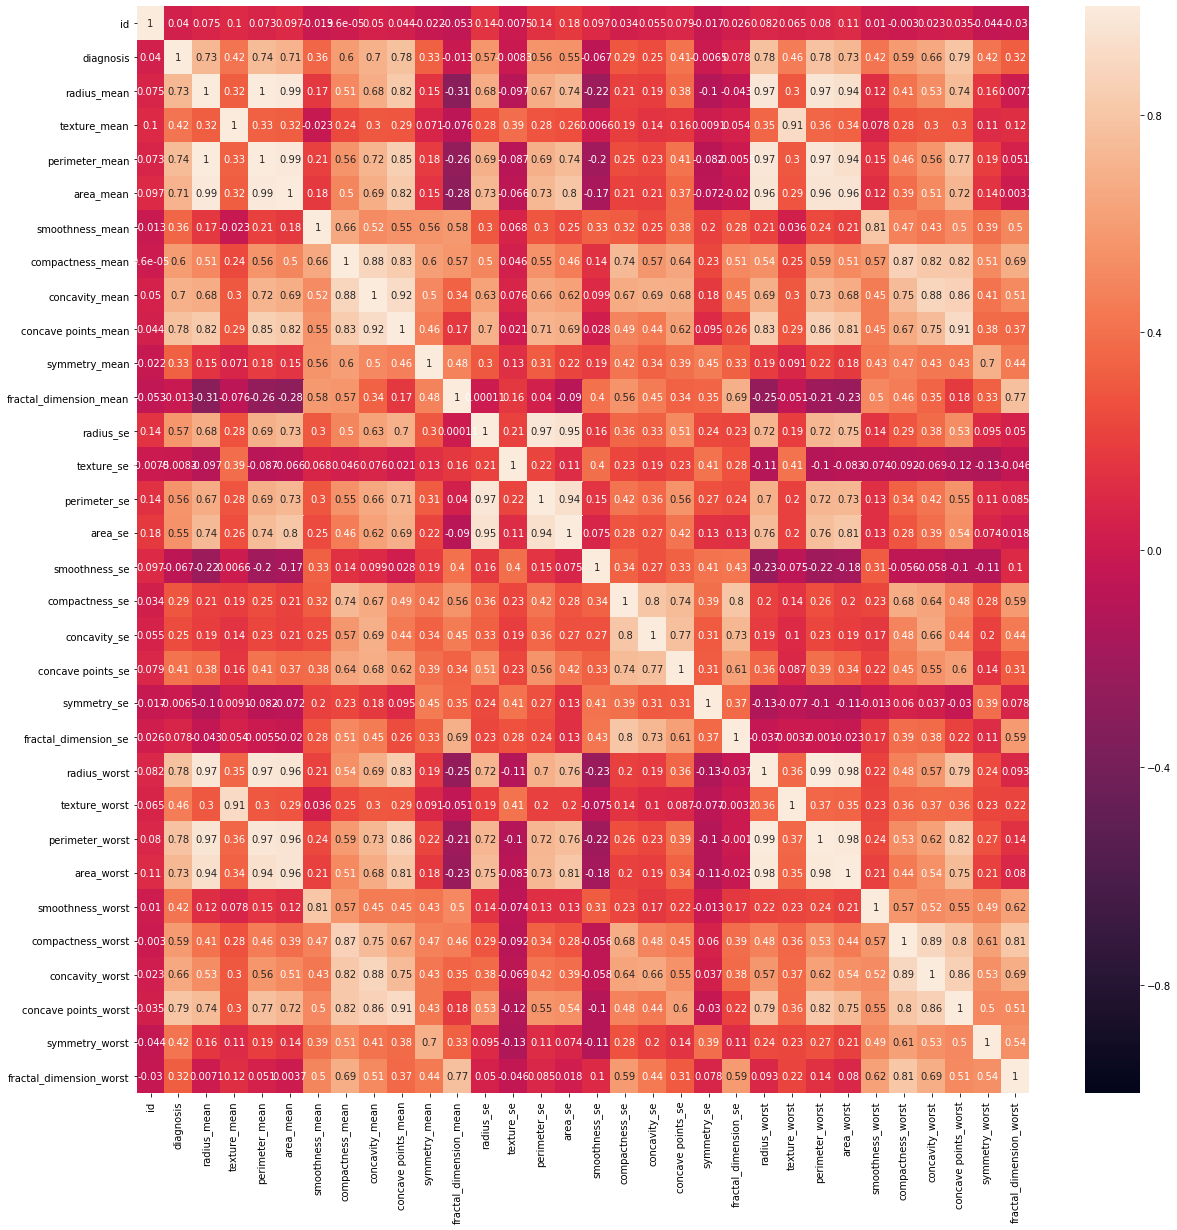

In [10]:
corr = data.corr()
plt.figure(figsize=(20, 20))
sb.heatmap(corr, vmax=1, vmin=-1, annot=True)

In [11]:
data[['radius_mean','radius_se','radius_worst']].head()

,radius_mean,radius_se,radius_worst
0,17.99,1.0950,25.38
1,20.57,0.5435,24.99
2,19.69,0.7456,23.57
3,11.42,0.4956,14.91
4,20.29,0.7572,22.54


In [12]:
data['concavity_mean'].describe()

count    569.000000
mean       0.088799
std        0.079720
min        0.000000
25%        0.029560
50%        0.061540
75%        0.130700
max        0.426800
Name: concavity_mean, dtype: float64

# Projeto Parte 2 : Pré-Processamento

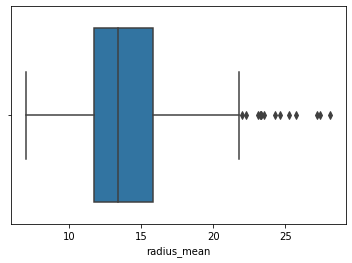

In [13]:
sb.boxplot(data['radius_mean'])

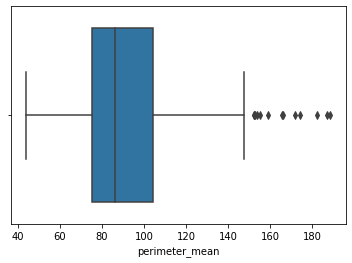

In [14]:
sb.boxplot(data['perimeter_mean'])

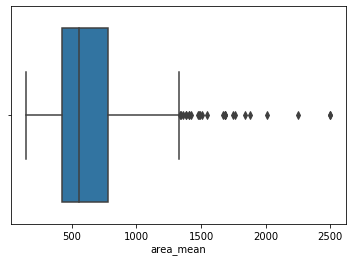

In [15]:
sb.boxplot(data['area_mean'])

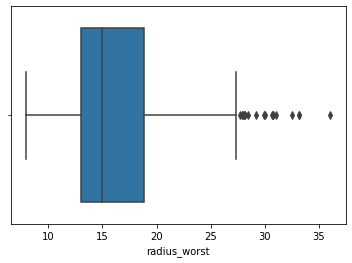

In [16]:
sb.boxplot(data['radius_worst'])

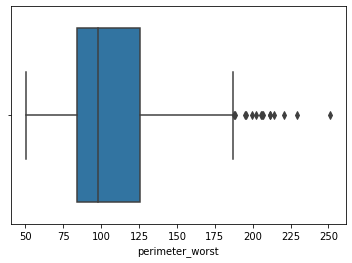

In [17]:
sb.boxplot(data['perimeter_worst'])

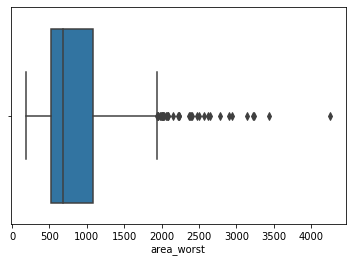

In [18]:
sb.boxplot(data['area_worst'])

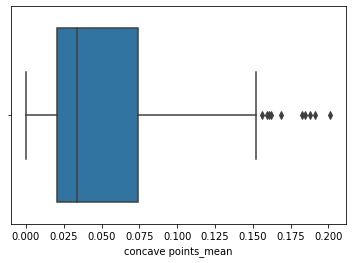

In [19]:
sb.boxplot(data['concave points_mean'])

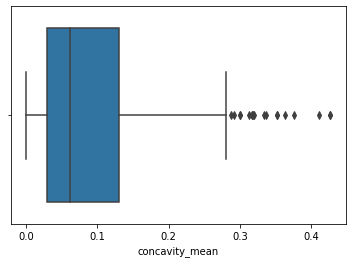

In [20]:
sb.boxplot(data['concavity_mean'])

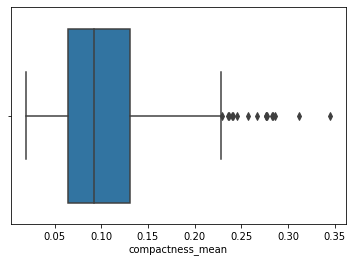

In [21]:
sb.boxplot(data['compactness_mean'])

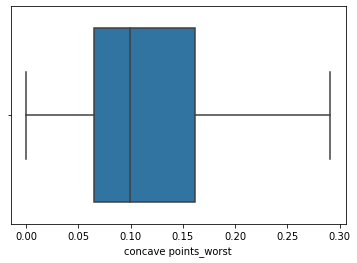

In [22]:
sb.boxplot(data['concave points_worst'])

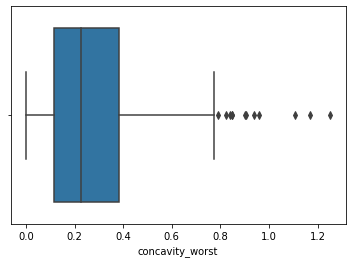

In [23]:
sb.boxplot(data['concavity_worst'])

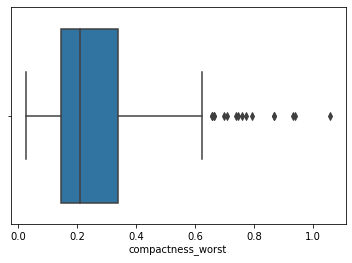

In [24]:
sb.boxplot(data['compactness_worst'])

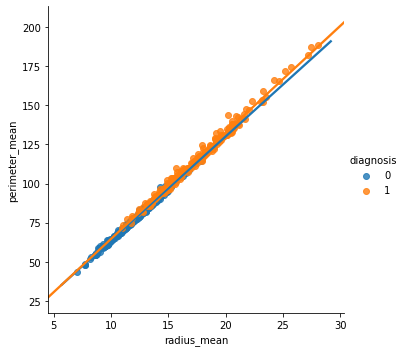

In [25]:
sb.lmplot(data=data, x='radius_mean',y='perimeter_mean', hue="diagnosis" )

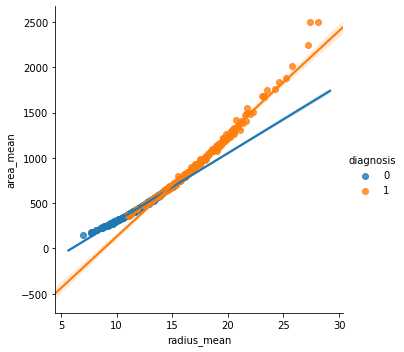

In [26]:
sb.lmplot(data=data, x='radius_mean',y='area_mean', hue="diagnosis" )

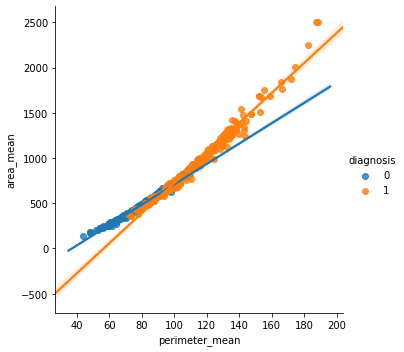

In [27]:
sb.lmplot(data=data, x='perimeter_mean',y='area_mean', hue="diagnosis" )

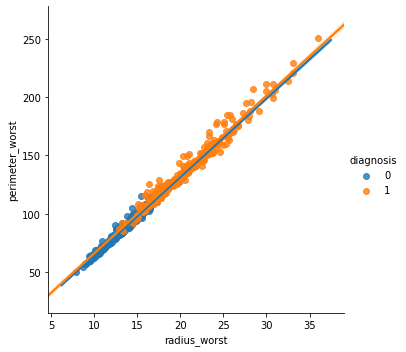

In [28]:
sb.lmplot(data=data, x='radius_worst',y='perimeter_worst', hue="diagnosis" )

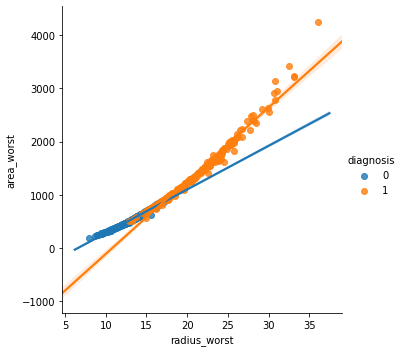

In [29]:
sb.lmplot(data=data, x='radius_worst',y='area_worst', hue="diagnosis" )

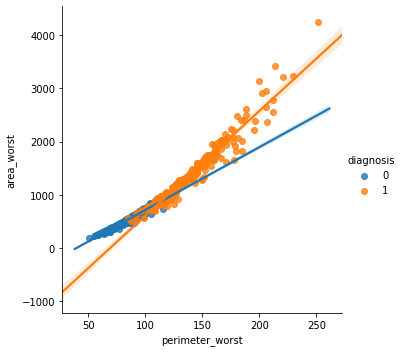

In [30]:
sb.lmplot(data=data, x='perimeter_worst',y='area_worst', hue="diagnosis" )

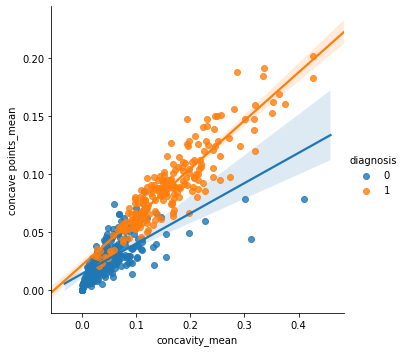

In [31]:
sb.lmplot(data=data, x='concavity_mean',y='concave points_mean', hue="diagnosis" )

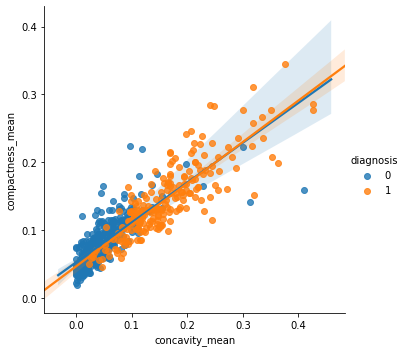

In [32]:
sb.lmplot(data=data, x='concavity_mean',y='compactness_mean', hue="diagnosis" )

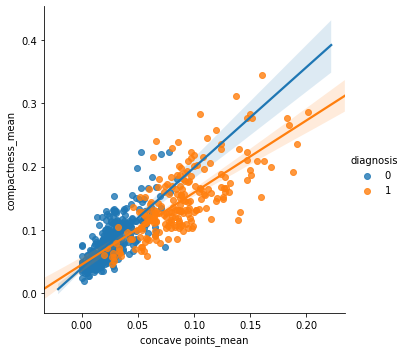

In [33]:
sb.lmplot(data=data, x='concave points_mean',y='compactness_mean', hue="diagnosis" )

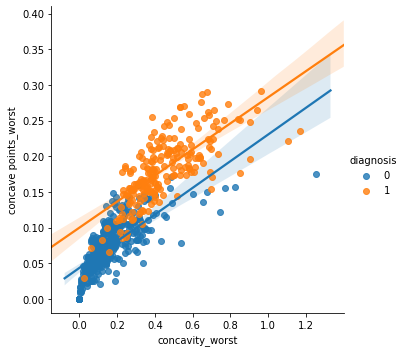

In [34]:
sb.lmplot(data=data, x='concavity_worst',y='concave points_worst', hue="diagnosis" )

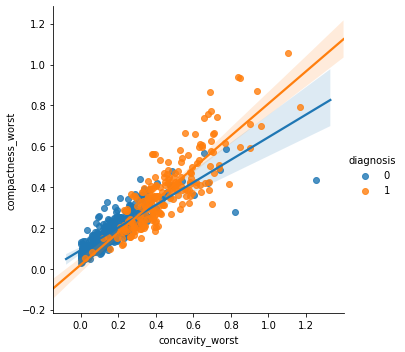

In [35]:
sb.lmplot(data=data, x='concavity_worst',y='compactness_worst', hue="diagnosis" )

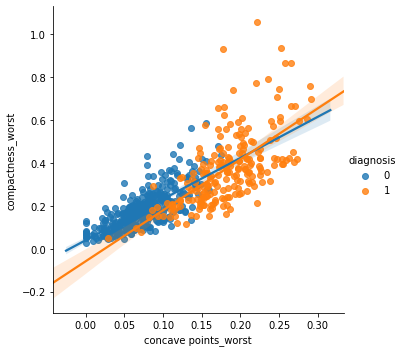

In [36]:
sb.lmplot(data=data, x='concave points_worst',y='compactness_worst', hue="diagnosis" )

Text(0, 0.5, 'Density')

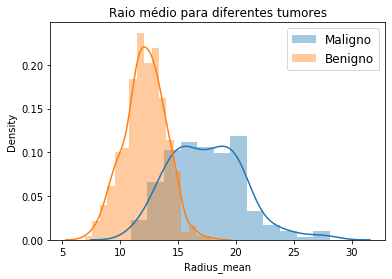

In [37]:
diag1 = data.query('diagnosis == 1')
sb.distplot(diag1['radius_mean'],  kde=True, label='Maligno')
diag0 = data.query('diagnosis == 0')
sb.distplot(diag0['radius_mean'],  kde=True, label='Benigno')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Raio médio para diferentes tumores')
plt.xlabel('Radius_mean')
plt.ylabel('Density')


Text(0, 0.5, 'Density')

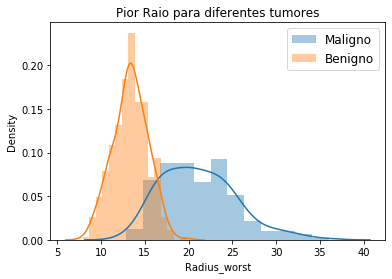

In [38]:
diag1 = data.query('diagnosis == 1')
sb.distplot(diag1['radius_worst'],  kde=True, label='Maligno')
diag0 = data.query('diagnosis == 0')
sb.distplot(diag0['radius_worst'],  kde=True, label='Benigno')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Pior Raio para diferentes tumores')
plt.xlabel('Radius_worst')
plt.ylabel('Density')



Text(0, 0.5, 'Density')

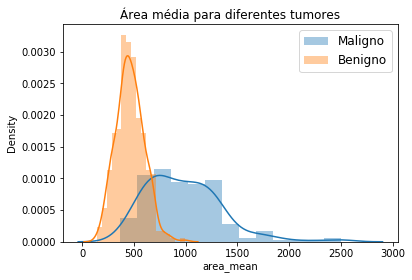

In [39]:
diag1 = data.query('diagnosis == 1')
sb.distplot(diag1['area_mean'],  kde=True, label='Maligno')
diag0 = data.query('diagnosis == 0')
sb.distplot(diag0['area_mean'],  kde=True, label='Benigno')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Área média para diferentes tumores')
plt.xlabel('area_mean')
plt.ylabel('Density')



Text(0, 0.5, 'Density')

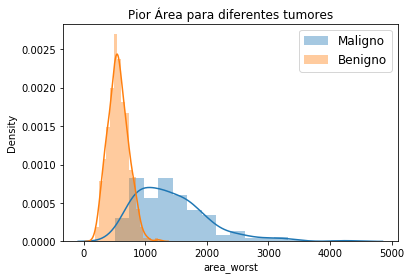

In [40]:
diag1 = data.query('diagnosis == 1')
sb.distplot(diag1['area_worst'],  kde=True, label='Maligno')
diag0 = data.query('diagnosis == 0')
sb.distplot(diag0['area_worst'],  kde=True, label='Benigno')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Pior Área para diferentes tumores')
plt.xlabel('area_worst')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

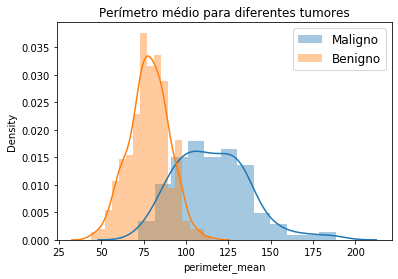

In [41]:
diag1 = data.query('diagnosis == 1')
sb.distplot(diag1['perimeter_mean'],  kde=True, label='Maligno')
diag0 = data.query('diagnosis == 0')
sb.distplot(diag0['perimeter_mean'],  kde=True, label='Benigno')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Perímetro médio para diferentes tumores')
plt.xlabel('perimeter_mean')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

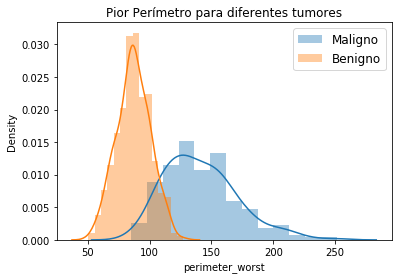

In [42]:
diag1 = data.query('diagnosis == 1')
sb.distplot(diag1['perimeter_worst'],  kde=True, label='Maligno')
diag0 = data.query('diagnosis == 0')
sb.distplot(diag0['perimeter_worst'],  kde=True, label='Benigno')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Pior Perímetro para diferentes tumores')
plt.xlabel('perimeter_worst')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

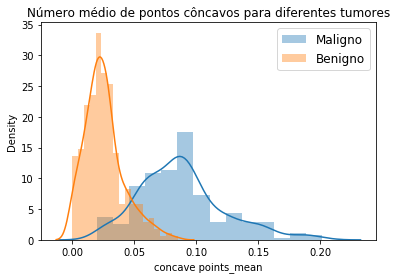

In [43]:
diag1 = data.query('diagnosis == 1')
sb.distplot(diag1['concave points_mean'],  kde=True, label='Maligno')
diag0 = data.query('diagnosis == 0')
sb.distplot(diag0['concave points_mean'],  kde=True, label='Benigno')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Número médio de pontos côncavos para diferentes tumores')
plt.xlabel('concave points_mean')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

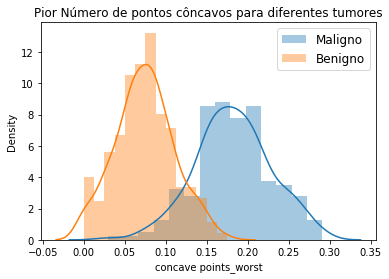

In [44]:
diag1 = data.query('diagnosis == 1')
sb.distplot(diag1['concave points_worst'],  kde=True, label='Maligno')
diag0 = data.query('diagnosis == 0')
sb.distplot(diag0['concave points_worst'],  kde=True, label='Benigno')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Pior Número de pontos côncavos para diferentes tumores')
plt.xlabel('concave points_worst')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

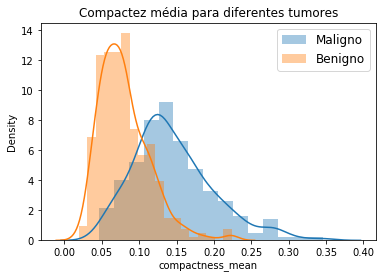

In [45]:
diag1 = data.query('diagnosis == 1')
sb.distplot(diag1['compactness_mean'],  kde=True, label='Maligno')
diag0 = data.query('diagnosis == 0')
sb.distplot(diag0['compactness_mean'],  kde=True, label='Benigno')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Compactez média para diferentes tumores')
plt.xlabel('compactness_mean')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

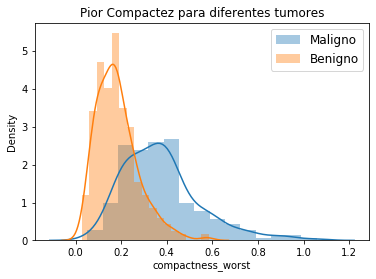

In [46]:
diag1 = data.query('diagnosis == 1')
sb.distplot(diag1['compactness_worst'],  kde=True, label='Maligno')
diag0 = data.query('diagnosis == 0')
sb.distplot(diag0['compactness_worst'],  kde=True, label='Benigno')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Pior Compactez para diferentes tumores')
plt.xlabel('compactness_worst')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

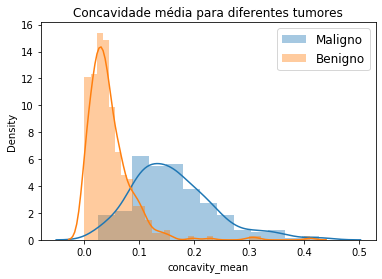

In [47]:
diag1 = data.query('diagnosis == 1')
sb.distplot(diag1['concavity_mean'],  kde=True, label='Maligno')
diag0 = data.query('diagnosis == 0')
sb.distplot(diag0['concavity_mean'],  kde=True, label='Benigno')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Concavidade média para diferentes tumores')
plt.xlabel('concavity_mean')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

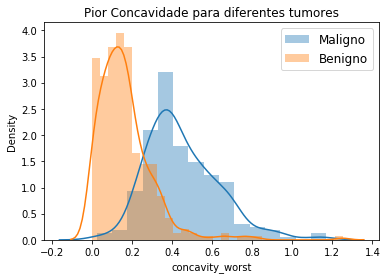

In [48]:
diag1 = data.query('diagnosis == 1')
sb.distplot(diag1['concavity_worst'],  kde=True, label='Maligno')
diag0 = data.query('diagnosis == 0')
sb.distplot(diag0['concavity_worst'],  kde=True, label='Benigno')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Pior Concavidade para diferentes tumores')
plt.xlabel('concavity_worst')
plt.ylabel('Density')

In [49]:
from sklearn.decomposition import PCA

In [50]:
data = data.drop(columns='id')

In [51]:
X = data.drop(columns='diagnosis')

In [52]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [53]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.98204467 0.01617649]


In [54]:
print(pca.components_)



[[ 5.08623202e-03  2.19657026e-03  3.50763298e-02  5.16826469e-01
   4.23694535e-06  4.05260047e-05  8.19399539e-05  4.77807775e-05
   7.07804332e-06 -2.62155251e-06  3.13742507e-04 -6.50984008e-05
   2.23634150e-03  5.57271669e-02 -8.05646029e-07  5.51918197e-06
   8.87094462e-06  3.27915009e-06 -1.24101836e-06 -8.54530832e-08
   7.15473257e-03  3.06736622e-03  4.94576447e-02  8.52063392e-01
   6.42005481e-06  1.01275937e-04  1.68928625e-04  7.36658178e-05
   1.78986262e-05  1.61356159e-06]
 [ 9.28705650e-03 -2.88160658e-03  6.27480827e-02  8.51823720e-01
  -1.48194356e-05 -2.68862249e-06  7.51419574e-05  4.63501038e-05
  -2.52430431e-05 -1.61197148e-05 -5.38692831e-05  3.48370414e-04
   8.19640791e-04  7.51112451e-03  1.49438131e-06  1.27357957e-05
   2.86921009e-05  9.36007477e-06  1.22647432e-05  2.89683790e-07
  -5.68673345e-04 -1.32152605e-02 -1.85961117e-04 -5.19742358e-01
  -7.68565692e-05 -2.56104144e-04 -1.75471479e-04 -3.05051743e-05
  -1.57042845e-04 -5.53071662e-05]]


In [55]:
print(pca.singular_values_)

[15876.66588813  2037.67927678]


In [56]:
projected = pca.fit_transform(X)
projected.data.shape

(569, 2)

In [57]:
X_pca2 = pd.DataFrame(data=projected)

In [58]:
X_pca2['diagnosis'] = data['diagnosis']
X_pca2.head()


,0,1,diagnosis
0,1160.142574,-293.917544,1
1,1269.122443,15.630182,1
2,995.793889,39.156743,1
3,-407.180803,-67.380320,1
4,930.341180,189.340742,1


In [59]:
X_pca2['PC1'] = X_pca2[0]
X_pca2['PC2'] = X_pca2[1]
X_pca2.head()



,0,1,diagnosis,PC1,PC2
0,1160.142574,-293.917544,1,1160.142574,-293.917544
1,1269.122443,15.630182,1,1269.122443,15.630182
2,995.793889,39.156743,1,995.793889,39.156743
3,-407.180803,-67.380320,1,-407.180803,-67.380320
4,930.341180,189.340742,1,930.341180,189.340742


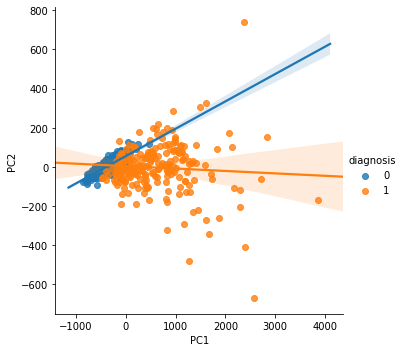

In [60]:
sb.lmplot(data=X_pca2, x='PC1', y='PC2', hue='diagnosis')

Text(0, 0.5, 'Density')

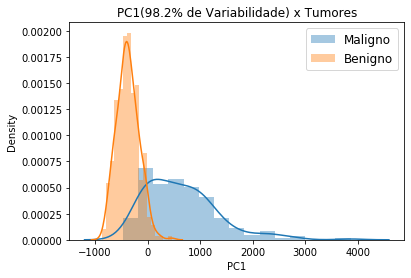

In [61]:
diag1 = X_pca2.query('diagnosis == 1')
sb.distplot(diag1['PC1'],  kde=True, label='Maligno')
diag0 = X_pca2.query('diagnosis == 0')
sb.distplot(diag0['PC1'],  kde=True, label='Benigno')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('PC1(98.2% de Variabilidade) x Tumores')
plt.xlabel('PC1')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

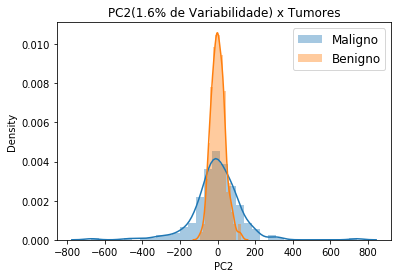

In [62]:
diag1 = X_pca2.query('diagnosis == 1')
sb.distplot(diag1['PC2'],  kde=True, label='Maligno')
diag0 = X_pca2.query('diagnosis == 0')
sb.distplot(diag0['PC2'],  kde=True, label='Benigno')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('PC2(1.6% de Variabilidade) x Tumores')
plt.xlabel('PC2')
plt.ylabel('Density')

In [63]:
pca = PCA(n_components=3)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.98204467 0.01617649 0.00155751]


In [64]:
pca = PCA(n_components=10)
pca.fit(X)
print(pca.explained_variance_ratio_)

[9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07]


In [65]:
from sklearn.metrics.pairwise import euclidean_distances

In [66]:
euc_dist = euclidean_distances(X,X)

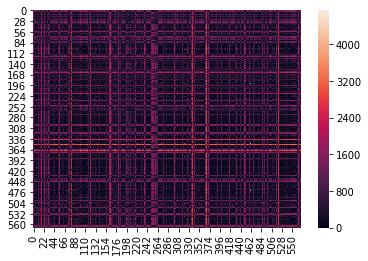

In [67]:
sb.heatmap(euc_dist)

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [69]:
data_ordenada = data.sort_values(by=['diagnosis'])
data_ordenada.head(600)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
284,0,12.890,15.70,84.08,516.6,0.07818,0.09580,0.111500,0.033900,0.1432,...,13.900,19.69,92.12,595.6,0.09926,0.23170,0.334400,0.10170,0.1999,0.07127
371,0,15.190,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.026570,0.1721,...,16.200,15.73,104.50,819.1,0.11260,0.17370,0.136200,0.08178,0.2487,0.06766
367,0,12.210,18.02,78.31,458.4,0.09231,0.07175,0.043920,0.020270,0.1695,...,14.290,24.04,93.85,624.6,0.13680,0.21700,0.241300,0.08829,0.3218,0.07470
364,0,13.400,16.95,85.48,552.4,0.07937,0.05696,0.021810,0.014730,0.1650,...,14.730,21.70,93.76,663.5,0.12130,0.16760,0.136400,0.06987,0.2741,0.07582
363,0,16.500,18.29,106.60,838.1,0.09686,0.08468,0.058620,0.048350,0.1495,...,18.130,25.45,117.20,1009.0,0.13380,0.16790,0.166300,0.09123,0.2394,0.06469
362,0,12.760,18.84,81.87,496.6,0.09676,0.07952,0.026880,0.017810,0.1759,...,13.750,25.99,87.82,579.7,0.12980,0.18390,0.125500,0.08312,0.2744,0.07238
361,0,13.300,21.57,85.24,546.1,0.08582,0.06373,0.033440,0.024240,0.1815,...,14.200,29.20,92.94,621.2,0.11400,0.16670,0.121200,0.05614,0.2637,0.06658
360,0,12.540,18.07,79.42,491.9,0.07436,0.02650,0.001194,0.005449,0.1528,...,13.720,20.98,86.82,585.7,0.09293,0.04327,0.003581,0.01635,0.2233,0.05521
359,0,9.436,18.32,59.82,278.6,0.10090,0.05956,0.027100,0.014060,0.1506,...,12.020,25.02,75.79,439.6,0.13330,0.10490,0.114400,0.05052,0.2454,0.08136
358,0,8.878,15.49,56.74,241.0,0.08293,0.07698,0.047210,0.023810,0.1930,...,9.981,17.70,65.27,302.0,0.10150,0.12480,0.094410,0.04762,0.2434,0.07431


In [70]:
X_ordenada = data_ordenada.drop(columns=['diagnosis'])
Y_ordenada = data_ordenada.diagnosis
X_ordenada.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
284,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.03390,0.1432,0.05935,...,13.90,19.69,92.12,595.6,0.09926,0.2317,0.3344,0.10170,0.1999,0.07127
371,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.11260,0.1737,0.1362,0.08178,0.2487,0.06766
367,12.21,18.02,78.31,458.4,0.09231,0.07175,0.04392,0.02027,0.1695,0.05916,...,14.29,24.04,93.85,624.6,0.13680,0.2170,0.2413,0.08829,0.3218,0.07470
364,13.40,16.95,85.48,552.4,0.07937,0.05696,0.02181,0.01473,0.1650,0.05701,...,14.73,21.70,93.76,663.5,0.12130,0.1676,0.1364,0.06987,0.2741,0.07582
363,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,...,18.13,25.45,117.20,1009.0,0.13380,0.1679,0.1663,0.09123,0.2394,0.06469


In [71]:
Y_ordenada.tail()

146    1
379    1
141    1
138    1
0      1
Name: diagnosis, dtype: int64

In [72]:
lda = LDA()
X_lda = lda.fit_transform(X_ordenada, Y_ordenada)

In [73]:
X_lda.data.shape

(569, 1)

In [74]:
euc_dist = euclidean_distances(X_lda,X_lda)

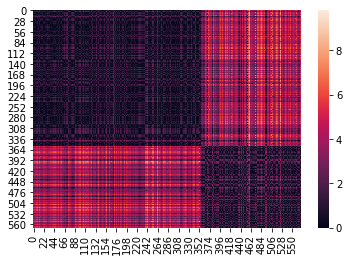

In [75]:
sb.heatmap(euc_dist)

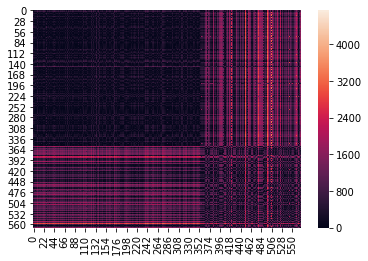

In [76]:
sb.heatmap(euclidean_distances(X_ordenada,X_ordenada))

In [77]:
lda.get_params

<bound method BaseEstimator.get_params of LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)>

In [78]:
Dataset_lda_ordenado = pd.DataFrame(Y_ordenada)
Dataset_lda_ordenado['lda']=X_lda

In [79]:
Dataset_lda_ordenado.head()

,diagnosis,lda
284,0,-1.854169
371,0,-1.533045
367,0,-0.755125
364,0,-1.476376
363,0,-0.045021


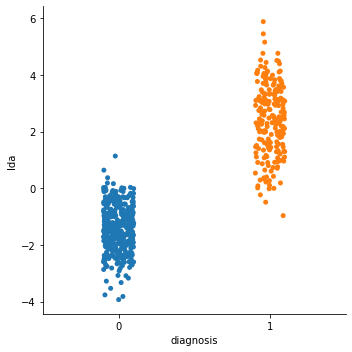

In [80]:
sb.catplot(x='diagnosis', y='lda', data=Dataset_lda_ordenado)

Text(0, 0.5, 'Classes')

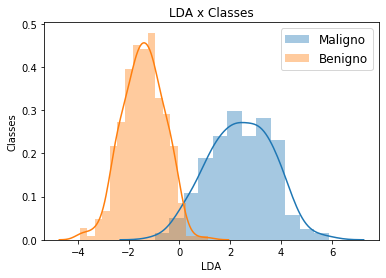

In [81]:
diag1 = Dataset_lda_ordenado.query('diagnosis == 1')
sb.distplot(diag1['lda'],  kde=True, label='Maligno')
diag0 = Dataset_lda_ordenado.query('diagnosis == 0')
sb.distplot(diag0['lda'],  kde=True, label='Benigno')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('LDA x Classes')
plt.xlabel('LDA')
plt.ylabel('Classes')

# Projeto 3 : Modelos de Classificação

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
SEED = 10
np.random.seed(SEED)
# Aleatoriedade no cross validate
# CV = KFold(n_splits = 10, shuffle = True)

CV = StratifiedKFold(n_splits = 10, shuffle = True, random_state=SEED) #estratificando, fazendo cross validation e escolhendo de forma alea

In [83]:
Dataset_pca2 = X_pca2[['PC1','PC2','diagnosis']]
Dataset_pca2.head()

,PC1,PC2,diagnosis
0,1160.142574,-293.917544,1
1,1269.122443,15.630182,1
2,995.793889,39.156743,1
3,-407.180803,-67.380320,1
4,930.341180,189.340742,1


In [84]:
Y = data['diagnosis']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [85]:
#3 Datasets 
#Dataset_lda_ordenado
#data = X, Y
#Dataset_pca2
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Testando os modelos Bayesianos em todos os 3 Datasets

In [86]:
from sklearn.naive_bayes import GaussianNB
Bayes_com_priori = GaussianNB()
Bayes_sem_priori = GaussianNB(priors=[0.5,0.5])

Dataframe_final = pd.DataFrame(columns = ['Modelo','Acurácia','Precisão','Recall','Dataset'])

In [87]:
dataset = 'Puro'
modelo = 'Bayes com Priori'
results = cross_validate(Bayes_com_priori, X, Y, cv = CV, scoring='accuracy')
acuracia = results['test_score'].mean()
results = cross_validate(Bayes_com_priori, X, Y, cv = CV, scoring='precision')
precision = results['test_score'].mean()
results = cross_validate(Bayes_com_priori, X, Y, cv = CV, scoring='recall')
recall = results['test_score'].mean()
array_visualizacao = [[modelo,acuracia,precision,recall,dataset]]
visualizacao = pd.DataFrame(array_visualizacao, columns = ['Modelo','Acurácia','Precisão','Recall','Dataset'])
Dataframe_final =  Dataframe_final.append(visualizacao)
visualizacao.head()

,Modelo,Acurácia,Precisão,Recall,Dataset
0,Bayes com Priori,0.941972,0.95086,0.896537,Puro


In [88]:
dataset = 'Puro'
modelo = 'Bayes sem Priori'
results = cross_validate(Bayes_sem_priori, X, Y, cv = CV, scoring='accuracy')
acuracia = results['test_score'].mean()
results = cross_validate(Bayes_sem_priori, X, Y, cv = CV, scoring='precision')
precision = results['test_score'].mean()
results = cross_validate(Bayes_sem_priori, X, Y, cv = CV, scoring='recall')
recall = results['test_score'].mean()
array_visualizacao = [[modelo,acuracia,precision,recall,dataset]]
visualizacao = pd.DataFrame(array_visualizacao, columns = ['Modelo','Acurácia','Precisão','Recall','Dataset'])
Dataframe_final = Dataframe_final.append(visualizacao)
visualizacao.head()

,Modelo,Acurácia,Precisão,Recall,Dataset
0,Bayes sem Priori,0.943697,0.95086,0.901082,Puro


In [89]:
X_pca2 = Dataset_pca2[['PC1','PC2']]
Y_pca2 = Dataset_pca2['diagnosis']

In [90]:
X_pca2_positivo = pd.DataFrame(columns = ['PC1','PC2'])


X_pca2_positivo['PC1'] = X_pca2['PC1']+1000
X_pca2_positivo['PC2'] = X_pca2['PC2']+800

modelo = 'Bayes com Priori'
dataset = 'PCA 2'
results = cross_validate(Bayes_com_priori, X_pca2_positivo, Y_pca2, cv = CV, scoring='accuracy')
acuracia = results['test_score'].mean()
results = cross_validate(Bayes_com_priori, X_pca2_positivo, Y_pca2, cv = CV, scoring='precision')
precision = results['test_score'].mean()
results = cross_validate(Bayes_com_priori, X_pca2_positivo, Y_pca2, cv = CV, scoring='recall')
recall = results['test_score'].mean()
array_visualizacao = [[modelo,acuracia,precision,recall,dataset]]
visualizacao = pd.DataFrame(array_visualizacao, columns = ['Modelo','Acurácia','Precisão','Recall','Dataset'])
Dataframe_final =  Dataframe_final.append(visualizacao)
visualizacao.head()

,Modelo,Acurácia,Precisão,Recall,Dataset
0,Bayes com Priori,0.901586,0.949623,0.778571,PCA 2


In [91]:
X_pca2_positivo = pd.DataFrame(columns = ['PC1','PC2'])

X_pca2_positivo['PC1'] = X_pca2['PC1']+1000
X_pca2_positivo['PC2'] = X_pca2['PC2']+800

modelo = 'Bayes sem Priori'
dataset = 'PCA 2'
results = cross_validate(Bayes_sem_priori, X_pca2_positivo, Y_pca2, cv = CV, scoring='accuracy')
acuracia = results['test_score'].mean()
results = cross_validate(Bayes_sem_priori, X_pca2_positivo, Y_pca2, cv = CV, scoring='precision')
precision = results['test_score'].mean()
results = cross_validate(Bayes_sem_priori, X_pca2_positivo, Y_pca2, cv = CV, scoring='recall')
recall = results['test_score'].mean()
array_visualizacao = [[modelo,acuracia,precision,recall,dataset]]
visualizacao = pd.DataFrame(array_visualizacao, columns = ['Modelo','Acurácia','Precisão','Recall','Dataset'])
Dataframe_final =  Dataframe_final.append(visualizacao)
visualizacao.head()

,Modelo,Acurácia,Precisão,Recall,Dataset
0,Bayes sem Priori,0.903339,0.923367,0.806926,PCA 2


In [92]:
X_lda_positivo = pd.DataFrame(columns = ['LDA'])

X_lda_positivo['LDA'] = Dataset_lda_ordenado['lda']+4
X_lda_positivo.head()

modelo = 'Bayes com Priori'
dataset = 'LDA'
results = cross_validate(Bayes_com_priori, X_lda_positivo, Dataset_lda_ordenado['diagnosis'], cv = CV, scoring='accuracy')
acuracia = results['test_score'].mean()
results = cross_validate(Bayes_com_priori, X_lda_positivo, Dataset_lda_ordenado['diagnosis'], cv = CV, scoring='precision')
precision = results['test_score'].mean()
results = cross_validate(Bayes_com_priori, X_lda_positivo, Dataset_lda_ordenado['diagnosis'], cv = CV, scoring='recall')
recall = results['test_score'].mean()
array_visualizacao = [[modelo,acuracia,precision,recall,dataset]]
visualizacao = pd.DataFrame(array_visualizacao, columns = ['Modelo','Acurácia','Precisão','Recall','Dataset'])
Dataframe_final =  Dataframe_final.append(visualizacao)
visualizacao.head()

,Modelo,Acurácia,Precisão,Recall,Dataset
0,Bayes com Priori,0.971802,0.986128,0.938312,LDA


In [93]:
X_lda_positivo = pd.DataFrame(columns = ['LDA'])

X_lda_positivo['LDA'] = Dataset_lda_ordenado['lda']+4
X_lda_positivo.head()

modelo = 'Bayes sem Priori'
dataset = 'LDA'
results = cross_validate(Bayes_sem_priori, X_lda_positivo, Dataset_lda_ordenado['diagnosis'], cv = CV, scoring='accuracy')
acuracia = results['test_score'].mean()
results = cross_validate(Bayes_sem_priori, X_lda_positivo, Dataset_lda_ordenado['diagnosis'], cv = CV, scoring='precision')
precision = results['test_score'].mean()
results = cross_validate(Bayes_sem_priori, X_lda_positivo, Dataset_lda_ordenado['diagnosis'], cv = CV, scoring='recall')
recall = results['test_score'].mean()
array_visualizacao = [[modelo,acuracia,precision,recall,dataset]]
visualizacao = pd.DataFrame(array_visualizacao, columns = ['Modelo','Acurácia','Precisão','Recall','Dataset'])
Dataframe_final =  Dataframe_final.append(visualizacao)
visualizacao.head()

,Modelo,Acurácia,Precisão,Recall,Dataset
0,Bayes sem Priori,0.97879,0.986128,0.957143,LDA


In [94]:
Dataframe_final

,Modelo,Acurácia,Precisão,Recall,Dataset
0,Bayes com Priori,0.941972,0.950860,0.896537,Puro
0,Bayes sem Priori,0.943697,0.950860,0.901082,Puro
0,Bayes com Priori,0.901586,0.949623,0.778571,PCA 2
0,Bayes sem Priori,0.903339,0.923367,0.806926,PCA 2
0,Bayes com Priori,0.971802,0.986128,0.938312,LDA
0,Bayes sem Priori,0.978790,0.986128,0.957143,LDA


# Regressão Logística

In [95]:
from sklearn.linear_model import LogisticRegression
logistica = LogisticRegression()

dataset = 'Puro'
modelo = 'Regressão Logística'
results = cross_validate(logistica, X, Y, cv = CV, scoring='accuracy')
acuracia = results['test_score'].mean()
results = cross_validate(logistica, X, Y, cv = CV, scoring='precision')
precision = results['test_score'].mean()
results = cross_validate(logistica, X, Y, cv = CV, scoring='recall')
recall = results['test_score'].mean()
array_visualizacao = [[modelo,acuracia,precision,recall,dataset]]
visualizacao = pd.DataFrame(array_visualizacao, columns = ['Modelo','Acurácia','Precisão','Recall','Dataset'])
Dataframe_final =  Dataframe_final.append(visualizacao)
visualizacao.head()

,Modelo,Acurácia,Precisão,Recall,Dataset
0,Regressão Logística,0.952407,0.956254,0.915152,Puro


In [96]:
X_pca2_positivo = pd.DataFrame(columns = ['PC1','PC2'])

X_pca2_positivo['PC1'] = X_pca2['PC1']
X_pca2_positivo['PC2'] = X_pca2['PC2']

modelo = 'Regressão Logística'
dataset = 'PCA 2'
results = cross_validate(logistica, X_pca2_positivo, Y_pca2, cv = CV, scoring='accuracy')
acuracia = results['test_score'].mean()
results = cross_validate(logistica, X_pca2_positivo, Y_pca2, cv = CV, scoring='precision')
precision = results['test_score'].mean()
results = cross_validate(logistica, X_pca2_positivo, Y_pca2, cv = CV, scoring='recall')
recall = results['test_score'].mean()
array_visualizacao = [[modelo,acuracia,precision,recall,dataset]]
visualizacao = pd.DataFrame(array_visualizacao, columns = ['Modelo','Acurácia','Precisão','Recall','Dataset'])
Dataframe_final =  Dataframe_final.append(visualizacao)
visualizacao.head()

,Modelo,Acurácia,Precisão,Recall,Dataset
0,Regressão Logística,0.924332,0.930238,0.863203,PCA 2


In [97]:
X_lda_positivo = pd.DataFrame(columns = ['LDA'])

X_lda_positivo['LDA'] = Dataset_lda_ordenado['lda']
X_lda_positivo.head()

modelo = 'Regressão Logística'
dataset = 'LDA'
results = cross_validate(logistica, X_lda_positivo, Dataset_lda_ordenado['diagnosis'], cv = CV, scoring='accuracy')
acuracia = results['test_score'].mean()
results = cross_validate(logistica, X_lda_positivo, Dataset_lda_ordenado['diagnosis'], cv = CV, scoring='precision')
precision = results['test_score'].mean()
results = cross_validate(logistica, X_lda_positivo, Dataset_lda_ordenado['diagnosis'], cv = CV, scoring='recall')
recall = results['test_score'].mean()
array_visualizacao = [[modelo,acuracia,precision,recall,dataset]]
visualizacao = pd.DataFrame(array_visualizacao, columns = ['Modelo','Acurácia','Precisão','Recall','Dataset'])
Dataframe_final =  Dataframe_final.append(visualizacao)
visualizacao.head()

,Modelo,Acurácia,Precisão,Recall,Dataset
0,Regressão Logística,0.977066,0.986128,0.952597,LDA


In [98]:
logistica_balanceado = LogisticRegression(class_weight='balanced')
modelo = 'Regressão Logística Balanceado'
dataset = 'LDA'
results = cross_validate(logistica_balanceado, X_lda_positivo, Dataset_lda_ordenado['diagnosis'], cv = CV, scoring='accuracy')
acuracia = results['test_score'].mean()
results = cross_validate(logistica_balanceado, X_lda_positivo, Dataset_lda_ordenado['diagnosis'], cv = CV, scoring='precision')
precision = results['test_score'].mean()
results = cross_validate(logistica_balanceado, X_lda_positivo, Dataset_lda_ordenado['diagnosis'], cv = CV, scoring='recall')
recall = results['test_score'].mean()
array_visualizacao = [[modelo,acuracia,precision,recall,dataset]]
visualizacao = pd.DataFrame(array_visualizacao, columns = ['Modelo','Acurácia','Precisão','Recall','Dataset'])
Dataframe_final =  Dataframe_final.append(visualizacao)
visualizacao.head()

,Modelo,Acurácia,Precisão,Recall,Dataset
0,Regressão Logística Balanceado,0.977035,0.977254,0.961905,LDA


In [99]:
Dataframe_final
#Recall é o mais importante!!!
#Importante observar que tirando a priori do PCA2 a precisão diminui
#Alem do que o PCA teve o pior desempenho e pode ser porque as médias estão próximas

,Modelo,Acurácia,Precisão,Recall,Dataset
0,Bayes com Priori,0.941972,0.950860,0.896537,Puro
0,Bayes sem Priori,0.943697,0.950860,0.901082,Puro
0,Bayes com Priori,0.901586,0.949623,0.778571,PCA 2
0,Bayes sem Priori,0.903339,0.923367,0.806926,PCA 2
0,Bayes com Priori,0.971802,0.986128,0.938312,LDA
0,Bayes sem Priori,0.978790,0.986128,0.957143,LDA
0,Regressão Logística,0.952407,0.956254,0.915152,Puro
0,Regressão Logística,0.924332,0.930238,0.863203,PCA 2
0,Regressão Logística,0.977066,0.986128,0.952597,LDA
0,Regressão Logística Balanceado,0.977035,0.977254,0.961905,LDA


In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [101]:
param_grid_puro = {'criterion':['gini','entropy'],'random_state':[SEED],'class_weight':[None, 'balanced'],'max_depth':[None,10,20,30] }
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_puro, cv=CV, scoring='recall')

In [102]:
grid.fit(X,Y)

C:\Users\jpbrs\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'class_weight': [None, 'balanced'],
    

In [103]:
decision_tree = grid.best_estimator_

In [104]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'random_state': 10}

In [105]:
decision_tree = grid.best_estimator_
modelo = 'Árvore de Decisão'
dataset = 'Puro'
results = cross_validate(decision_tree, X, Y, cv = CV, scoring='accuracy')
acuracia = results['test_score'].mean()
results = cross_validate(decision_tree, X, Y, cv = CV, scoring='precision')
precision = results['test_score'].mean()
results = cross_validate(decision_tree, X, Y, cv = CV, scoring='recall')
recall = results['test_score'].mean()
array_visualizacao = [[modelo,acuracia,precision,recall,dataset]]
visualizacao = pd.DataFrame(array_visualizacao, columns = ['Modelo','Acurácia','Precisão','Recall','Dataset'])
Dataframe_final =  Dataframe_final.append(visualizacao)
visualizacao.head()

,Modelo,Acurácia,Precisão,Recall,Dataset
0,Árvore de Decisão,0.93123,0.903036,0.924459,Puro


In [106]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'
print(os.environ['PATH'])

C:\Users\jpbrs\Anaconda3;C:\Users\jpbrs\Anaconda3\Library\mingw-w64\bin;C:\Users\jpbrs\Anaconda3\Library\usr\bin;C:\Users\jpbrs\Anaconda3\Library\bin;C:\Users\jpbrs\Anaconda3\Scripts;C:\Users\jpbrs\Anaconda3\bin;C:\Users\jpbrs\Anaconda3\condabin;C:\Users\jpbrs\Anaconda3;C:\Users\jpbrs\Anaconda3\Library\mingw-w64\bin;C:\Users\jpbrs\Anaconda3\Library\usr\bin;C:\Users\jpbrs\Anaconda3\Library\bin;C:\Users\jpbrs\Anaconda3\Scripts;C:\Program Files (x86)\Common Files\Oracle\Java\javapath;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0;C:\Windows\System32\OpenSSH;C:\Program Files\Git\cmd;C:\Users\jpbrs\Anaconda3;C:\Users\jpbrs\Anaconda3\Library\mingw-w64\bin;C:\Users\jpbrs\Anaconda3\Library\usr\bin;C:\Users\jpbrs\Anaconda3\Library\bin;C:\Users\jpbrs\Anaconda3\Scripts;C:\Users\jpbrs\AppData\Local\Microsoft\WindowsApps;C:\Program Files\JetBrains\PyCharm Community Edition 2019.2.2\bin;.;C:\Program Files (x86)\Graphviz2.38in


In [109]:
from sklearn.tree import export_graphviz
import graphviz

features = X.columns

dot_data = export_graphviz(decision_tree, feature_names = features, filled=True, rounded=True)#filled e rounded sao so frescura pra ficar bonito
grafico = graphviz.Source(dot_data)
grafico

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [108]:
param_grid_pca = {'criterion':['gini','entropy'],'random_state':[SEED],'class_weight':[None, 'balanced'] }
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_puro, cv=CV, scoring='recall')